# Question 2

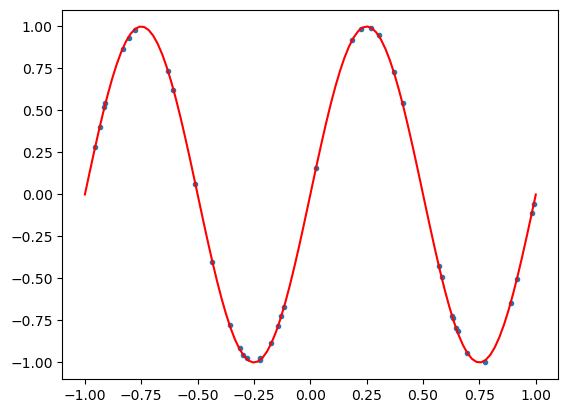

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M=40
Epochs=100
x = np.random.uniform(-1, 1, M)
epsilon = 0.1*np.random.uniform(-1, 1, M)
y = np.sin(2*np.pi*x) + 0.1*epsilon
plt.plot(x,y, '.')
# regualar grid to actually plot sine function:
xgrid = np.linspace(-1, 1, 100)
ygrid = np.sin(2*np.pi*xgrid)
plt.plot(xgrid, ygrid, 'r')

In [45]:
# initialize weights and total Cost-weight gradients
W1 = 0.9*np.random.uniform(-1, 1, (50, 1))
W2 = 0.9*np.random.uniform(-1, 1, (50, 50))
W3 = 0.9*np.random.uniform(-1, 1, (1, 50))

dC_dW1 = np.zeros((50, 1))
dC_dW2 = np.zeros((50, 50))
dC_dW3 = np.zeros((1, 50))

# initialize bias vectors and total Cost-bias gradients
b1 = 0.1*np.random.uniform(-1, 1, (50, 1))
b2 = 0.1*np.random.uniform(-1, 1, (50, 1))
b3 = 0.1*np.random.uniform(-1, 1, (1, 1))

dC_db1 = np.zeros((50, 1))
dC_db2 = np.zeros((50, 1))
dC_db3 = np.zeros((1, 1))

# define learning rate
alpha = 0.002

In [46]:
def fnn(x,w1,w2,w3,b1,b2,b3,sigma):
    '''
    fnn is the forward neural network function. Computes the forward pass
    '''
    y_hat=w3@sigma(w2@sigma(w1*x+b1)+b2)+b3
    return(y_hat)

In [47]:
def sin_true(x):
    '''
    ground truth sine function
    '''
    return(np.sin(2*np.pi*x))

In [48]:
def loss(y,y_hat):
    '''
    Manual MSE function
    '''
    return((y-y_hat)**2)

In [49]:
'''
Activation function tanh and its derivative
'''

def sigma(z):
  return np.tanh(z)

def sigma_prime(z):
  return 1 - np.tanh(z)**2

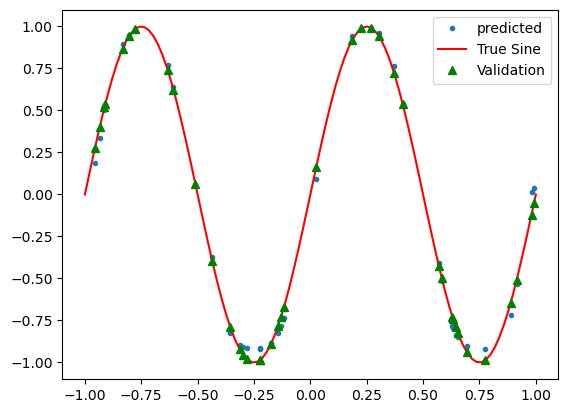

In [50]:
'''
The deep learning algorithm from DL3.6 (Algorithm 1)
'''
import os,shutil
if os.path.exists(os.path.join(os.getcwd(),"_PNG_man")):
    shutil.rmtree("_PNG_man")
    os.mkdir("_PNG_man")
else:
    os.mkdir("_PNG_man")
Epochs=500
for epoch in range(Epochs):
  for i in range(M): # loop over samples
    y_hat=fnn(y[i],W1,W2,W3,b1,b2,b3,sigma)
    C=loss(sin_true(x[i]),y_hat)
    delta3=-1*(sin_true(x[i])-y_hat)
    delta2=W3.T@delta3*sigma_prime(W2@sigma(W1*y[i]+b1)+b2)
    delta1=W2.T@delta2*sigma_prime(W1*y[i]+b1)
    dc_dw3=delta3@(sigma(W2@sigma(W1*y[i]+b1)+b2)).T
    dc_dw2=delta2@(sigma(W1*y[i]+b1)).T
    dc_dw1=delta1*(W1*y[i]+b1)
    dC_dW1+=dc_dw1
    dC_dW2+=dc_dw2
    dC_dW3+=dc_dw3
    dC_db1+=delta1
    dC_db2+=delta2
    dC_db3+=delta3
  dC_dW1/=M
  dC_dW2/=M
  dC_dW3/=M
  dC_db1/=M
  dC_db2/=M
  dC_db3/=M
  W1=W1-alpha*dC_dW1
  W2=W2-alpha*dC_dW2
  W3=W3-alpha*dC_dW3
  b1=b1-alpha*dC_db1
  b2=b2-alpha*dC_db2
  b3=b3-alpha*dC_db3
  dC_dW1[:,:]=0
  dC_dW2[:,:]=0
  dC_dW3[:,:]=0
  dC_db1[:,:]=0
  dC_db2[:,:]=0
  dC_db3[:,:]=0
  y_hat=fnn(y,W1,W2,W3,b1,b2,b3,sigma)
  plt.clf()
  plt.plot(x,y_hat[0,:], '.',label="predicted")
# regualar grid to actually plot sine function:
  xgrid = np.linspace(-1, 1, 100)
  ygrid = np.sin(2*np.pi*xgrid)
  plt.plot(xgrid, ygrid, 'r',label="True Sine")
  plt.plot(x, np.sin(2*np.pi*x), 'g^',label="Validation")
  plt.ylim([-1.1,1.1])
  plt.legend()
  #save plots to png files to create .gif (pronounced Xylophone movie)
  plt.savefig(f"_PNG_man/HW4_epoch_{str(epoch).zfill(4)}.png")


In [51]:
'''
Compile png files to make movie in mentioned directory
'''

import imageio
import os
images=[]
files=os.listdir("_PNG_man")
files.sort()
files = [f for f in files if os.path.isfile(f"_PNG_man/{f}")]
print(files)
for filename in files:
    
    images.append(imageio.imread(f"_PNG_man/{filename}"))
imageio.mimsave("_GIFS/man_sine.gif", images)

['HW4_epoch_0000.png', 'HW4_epoch_0001.png', 'HW4_epoch_0002.png', 'HW4_epoch_0003.png', 'HW4_epoch_0004.png', 'HW4_epoch_0005.png', 'HW4_epoch_0006.png', 'HW4_epoch_0007.png', 'HW4_epoch_0008.png', 'HW4_epoch_0009.png', 'HW4_epoch_0010.png', 'HW4_epoch_0011.png', 'HW4_epoch_0012.png', 'HW4_epoch_0013.png', 'HW4_epoch_0014.png', 'HW4_epoch_0015.png', 'HW4_epoch_0016.png', 'HW4_epoch_0017.png', 'HW4_epoch_0018.png', 'HW4_epoch_0019.png', 'HW4_epoch_0020.png', 'HW4_epoch_0021.png', 'HW4_epoch_0022.png', 'HW4_epoch_0023.png', 'HW4_epoch_0024.png', 'HW4_epoch_0025.png', 'HW4_epoch_0026.png', 'HW4_epoch_0027.png', 'HW4_epoch_0028.png', 'HW4_epoch_0029.png', 'HW4_epoch_0030.png', 'HW4_epoch_0031.png', 'HW4_epoch_0032.png', 'HW4_epoch_0033.png', 'HW4_epoch_0034.png', 'HW4_epoch_0035.png', 'HW4_epoch_0036.png', 'HW4_epoch_0037.png', 'HW4_epoch_0038.png', 'HW4_epoch_0039.png', 'HW4_epoch_0040.png', 'HW4_epoch_0041.png', 'HW4_epoch_0042.png', 'HW4_epoch_0043.png', 'HW4_epoch_0044.png', 'HW4_epoc

/var/folders/ws/b5qjqyms2c11lb15pc6lklw40000gn/T/ipykernel_25211/25674120.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"_PNG_man/{filename}"))


# Question 3

In [17]:

import torch
import torch.nn as nn

In [39]:
class mySinNet(nn.Module):
    '''
    Neural network to approximate sine function from random data
    '''
    def __init__(self,input_size,hidden_size,output_size) -> None:

        super(mySinNet, self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.output_size=output_size

        self.i2h=nn.Linear(input_size,hidden_size)
        self.h2h=nn.Linear(hidden_size,hidden_size)
        self.h2o=nn.Linear(hidden_size,output_size)
    def forward(self,x):
        x=torch.tanh(self.i2h(x))
        x=torch.tanh(self.h2h(x))
        x=self.h2o(x)
        return(x)
    

In [40]:
model=mySinNet(40,50,40) #input size, neurons, output size


In [41]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0002)

In [42]:
data_X=torch.tensor([[x] for x in x],dtype=torch.float)
data_Y=torch.tensor([[y] for y in y],dtype=torch.float)
print(data_X.shape)

torch.Size([40, 1])


torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])
torch.Size([1, 40]) torch.Size([40, 1])


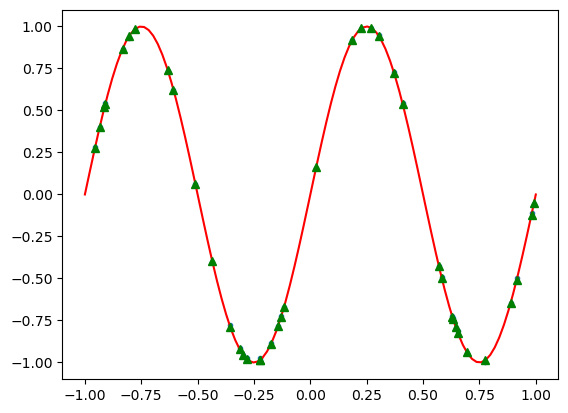

In [43]:
'''
DL algorithm with the pytorch wrapper
'''
import os,shutil
if os.path.exists(os.path.join(os.getcwd(),"_PNG_torch")):
    shutil.rmtree("_PNG_torch")
    os.mkdir("_PNG_torch")
else:
    os.mkdir("_PNG_torch")

# training the model and plotting the loss.

losses=[]


EPOCHS=500

for epoch in range(EPOCHS):
    #clear the gradients of the optimizer before running the back propagation
    optimizer.zero_grad()
    # get the model prediction through a forward pass
    pred_y=model(data_X.T)
    print(pred_y.shape,data_Y.shape)
    # calculate the loss, using the model pred and ground obs
    loss=criterion(pred_y.T,data_Y)
    # Back propagation
    loss.backward()

    # update all trainable parameters
    optimizer.step()

    #Append the losses
    losses.append(loss.item())
    plt.clf()
    plt.plot(x,pred_y.detach().numpy()[0,:], '.',label="predicted")
# regualar grid to actually plot sine function:
    xgrid = np.linspace(-1, 1, 100)
    ygrid = np.sin(2*np.pi*xgrid)
    plt.plot(xgrid, ygrid, 'r',label="True Sine")
    plt.plot(x, np.sin(2*np.pi*x), 'g^',label="Validation")
    plt.ylim([-1.1,1.1])
    
    plt.savefig(f"_PNG_torch/HW4_epoch_{str(epoch).zfill(4)}.png")


In [44]:
import imageio
import os
images=[]
files=os.listdir("_PNG_torch")
files.sort()
files = [f for f in files if os.path.isfile(f"_PNG_torch/{f}")]
print(files)
for filename in files:
    
    images.append(imageio.imread(f"_PNG_torch/{filename}"))
imageio.mimsave("_GIFS/torch_sine.gif", images)

['HW4_epoch_0000.png', 'HW4_epoch_0001.png', 'HW4_epoch_0002.png', 'HW4_epoch_0003.png', 'HW4_epoch_0004.png', 'HW4_epoch_0005.png', 'HW4_epoch_0006.png', 'HW4_epoch_0007.png', 'HW4_epoch_0008.png', 'HW4_epoch_0009.png', 'HW4_epoch_0010.png', 'HW4_epoch_0011.png', 'HW4_epoch_0012.png', 'HW4_epoch_0013.png', 'HW4_epoch_0014.png', 'HW4_epoch_0015.png', 'HW4_epoch_0016.png', 'HW4_epoch_0017.png', 'HW4_epoch_0018.png', 'HW4_epoch_0019.png', 'HW4_epoch_0020.png', 'HW4_epoch_0021.png', 'HW4_epoch_0022.png', 'HW4_epoch_0023.png', 'HW4_epoch_0024.png', 'HW4_epoch_0025.png', 'HW4_epoch_0026.png', 'HW4_epoch_0027.png', 'HW4_epoch_0028.png', 'HW4_epoch_0029.png', 'HW4_epoch_0030.png', 'HW4_epoch_0031.png', 'HW4_epoch_0032.png', 'HW4_epoch_0033.png', 'HW4_epoch_0034.png', 'HW4_epoch_0035.png', 'HW4_epoch_0036.png', 'HW4_epoch_0037.png', 'HW4_epoch_0038.png', 'HW4_epoch_0039.png', 'HW4_epoch_0040.png', 'HW4_epoch_0041.png', 'HW4_epoch_0042.png', 'HW4_epoch_0043.png', 'HW4_epoch_0044.png', 'HW4_epoc

/var/folders/ws/b5qjqyms2c11lb15pc6lklw40000gn/T/ipykernel_25211/2683893477.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"_PNG_torch/{filename}"))


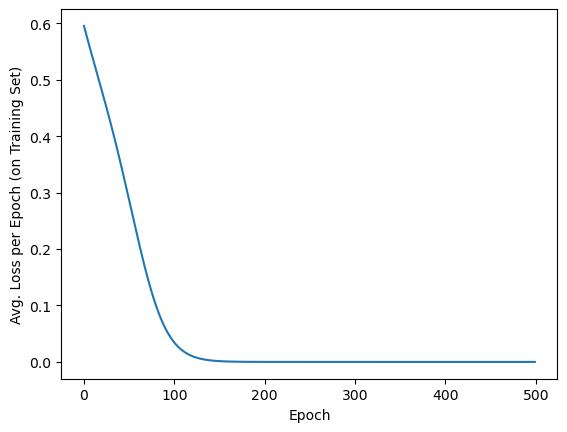

In [35]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Avg. Loss per Epoch (on Training Set)')
plt.show()